# PRAKTIKUM MINGGU KE 8 PART 2

## praktik 1 Menghitung jarak berbasis piksel (Euclidean & Manfattan)

- metode Euclidean menghitung akar dari jumlah kuadrat perbedaan nilai piksel pada posisi yang sesuai
- metode Manhattan menghitung jumlah dari nilai absolut perbedaan nilai piksel pada posisi yang sesuai.

praktikum ini bertujuan untuk membandingkan jarak euclidean dan manhattan

### Kode program

Jarak Euclidean antara Patch 1 dan Patch 2: 24.7650
Jarak Euclidean antara Patch 1 dan Patch 3: 5.0000
Jarak Manhattan antara Patch 1 dan Patch 2: 936.4392
Jarak Manhattan antara Patch 1 dan Patch 3: 250.0000


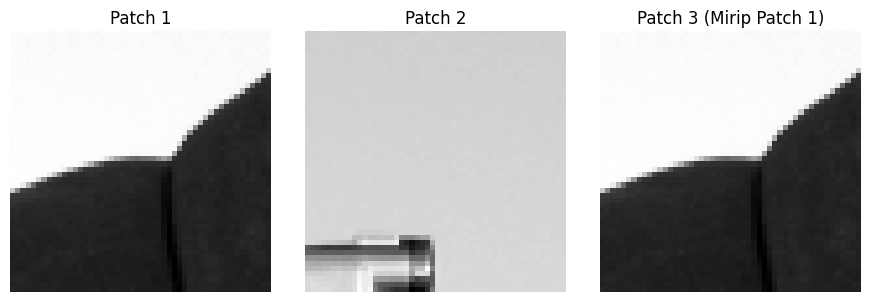

In [1]:
import numpy as np
from skimage import data, img_as_float
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 1. Ambil citra dan buat tiga patch
image = img_as_float(data.camera())
patch1 = image[100:150, 100:150]                 # Patch asli
patch2 = image[100:150, 300:350]                 # Patch dari lokasi berbeda
patch3 = np.clip(patch1 + 0.1, 0, 1)             # Patch1 dengan sedikit noise

# 2. Ubah patch menjadi vektor 1D
vec1 = patch1.flatten()
vec2 = patch2.flatten()
vec3 = patch3.flatten()

# 3. Hitung jarak Euclidean (L2)
dist_l2_12 = distance.euclidean(vec1, vec2)
dist_l2_13 = distance.euclidean(vec1, vec3)

# 4. Hitung jarak Manhattan (L1)
dist_l1_12 = distance.cityblock(vec1, vec2)
dist_l1_13 = distance.cityblock(vec1, vec3)

# 5. Tampilkan hasil perhitungan jarak
print(f"Jarak Euclidean antara Patch 1 dan Patch 2: {dist_l2_12:.4f}")
print(f"Jarak Euclidean antara Patch 1 dan Patch 3: {dist_l2_13:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 2: {dist_l1_12:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 3: {dist_l1_13:.4f}")

# 6. Tampilkan patch citra untuk visualisasi
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
titles = ['Patch 1', 'Patch 2', 'Patch 3 (Mirip Patch 1)']
patches = [patch1, patch2, patch3]

for ax, patch, title in zip(axes, patches, titles):
    ax.imshow(patch, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


### Perbandingan Jarak Euclidean(L2) dan Manhattan(L1)
dari hasil diatas terlihat patch 1 dan patch 3 memiliki jarak lebih kecil dibanding dengan pach 1 dan patch 2, baik menggunakan L2 ataupun L1. Hasil ini sesuai dengan ekspektasi visual karena:
- Patch 3 adalah gambar 1 yang ditambahkan noise ringan (masih mirip)
- patch 2 dari gambar memiliki perbedaan yang jauh dan berasal dari gambar yang berbeda

**Perbandingan Tren Jarak L1 dan L2**
- L2 lebih sensitif terhadap perubahan atau perbedaan besar di beberapa titik karena kuadrat perbedaan sehingga lebih cocok untuk citra dengan perubahan drastis dari pikselnya
- L1 menjumlahkan seluruh perbedaan secara linear sehingga lebih tahan terhadap outlier kecil tetapi angkanya cenderung lebih besar secara absolut 


## Praktik 2 Menghitung Cosine Similarity antara Histogram Warna

**Cosine Similarity** mengukur kosinus sudt antara dua vektor fitur contohnya histogram warna, vektor dari deep learning yang nilainya berkisar -1 sampai 1. jika mendekati 0 brarti tidak ada kemiripan.

praktikum ini menghitung kemiripan antara dua citra berwarna berdasarkan warnanya

Cosine Similarity antara Image 1 dan Image 2 (Coffee): 0.8156
Cosine Similarity antara Image 1 dan Image 3 (Same): 1.0000
Cosine Similarity antara Image 1 dan Image 4 (Downsampled): 1.0000


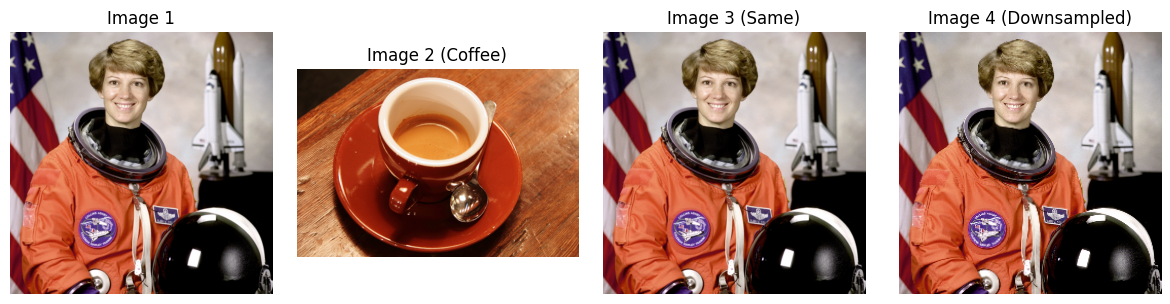

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte
from scipy.spatial import distance

# Fungsi untuk menghitung histogram RGB gabungan
def calculate_rgb_histogram(image, bins=16):
    img_uint8 = img_as_ubyte(image)
    hist_r, _ = np.histogram(img_uint8[:, :, 0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(img_uint8[:, :, 1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(img_uint8[:, :, 2].ravel(), bins=bins, range=(0, 256))
    
    # Gabungkan dan normalisasi histogram
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    hist_combined = hist_combined.astype(float) / np.sum(hist_combined)
    return hist_combined

# 1. Muat citra
try:
    image1 = data.astronaut()
    image2 = data.coffee()             # Berbeda
    image3 = data.astronaut()          # Sama
    image4 = image1[::2, ::2, :]       # Downsampled
except Exception as e:
    print(f"Gagal memuat data: {e}. Membuat citra dummy.")
    image1 = np.random.rand(100, 100, 3)
    image2 = np.random.rand(100, 100, 3) * 0.5
    image3 = image1.copy()
    image4 = image1[::2, ::2, :]

# 2. Hitung histogram RGB
hist1 = calculate_rgb_histogram(image1)
hist2 = calculate_rgb_histogram(image2)
hist3 = calculate_rgb_histogram(image3)
hist4 = calculate_rgb_histogram(image4)

# 3. Hitung Cosine Similarity (1 - cosine distance)
sim_12 = 1 - distance.cosine(hist1, hist2)
sim_13 = 1 - distance.cosine(hist1, hist3)
sim_14 = 1 - distance.cosine(hist1, hist4)

# 4. Tampilkan hasil
print(f"Cosine Similarity antara Image 1 dan Image 2 (Coffee): {sim_12:.4f}")
print(f"Cosine Similarity antara Image 1 dan Image 3 (Same): {sim_13:.4f}")
print(f"Cosine Similarity antara Image 1 dan Image 4 (Downsampled): {sim_14:.4f}")

# 5. Visualisasi
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
titles = ['Image 1', 'Image 2 (Coffee)', 'Image 3 (Same)', 'Image 4 (Downsampled)']
images = [image1, image2, image3, image4]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


### Pengamatan Hasil dari Cosine Similarity
- nilai dari perbandingan image 1 dan image 3 sangat identik karena menggunakan gambar yang sama sehingga nilainya 1 sempurna
- perbandingan image 1 dan image 2 yang menggunakan gambar coffe mendapat nilai 0.8156, itu masih tergolong nilai yang tinggi dan bisa dibilang identik dari perbandingan histogram warna
- perbandingan image 1 dan image 4 juga mendapat nilai 1 sempurna walaupun gambar 4 sudah dilakukan penurunan kualitas.


## Praktik 3 Menghitung Structural Similarity Index (SSIM)

SSIM merupakan metode pengukuran kemiripan yang dirancang agar lebih sesuai dengan persepsi dari visual manusia dibanding metrik berbasis piksel seperti MSE (Mean Square erorr) atau PSNR. metode ini membandingkan 3 komponen yaitu kontras, stuktur, dan luminasi atau tingkat cahaya.

Praktikum ini mengukur kemiripan struktural antara dua citra menggunakan SSIM.

SSIM (Ref vs Same): 1.0000
SSIM (Ref vs Noisy): 0.2953
SSIM (Ref vs Contrast): 0.9651
SSIM (Ref vs Blurred): 0.8027


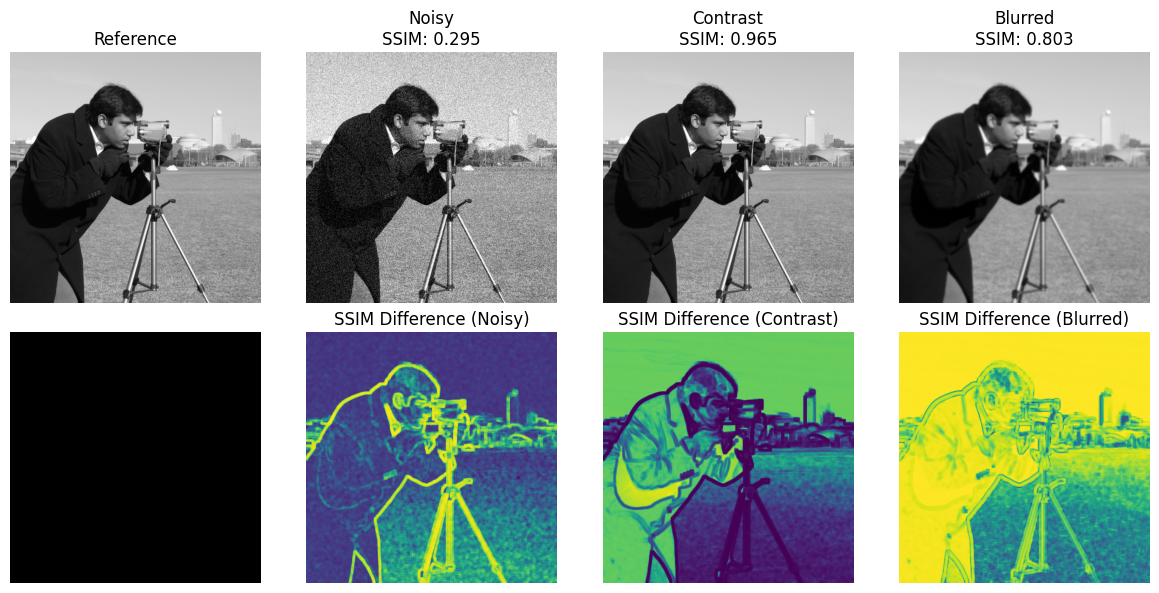

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
from skimage.util import random_noise
from skimage.filters import gaussian

# 1. Muat citra referensi
image_ref = img_as_float(data.camera())

# 2. Buat beberapa versi citra yang 'terdistorsi'
image_same = image_ref.copy()  # a) Citra yang sama
image_noisy = random_noise(image_ref, mode='gaussian', var=0.01)  # b) Tambahkan noise Gaussian
image_contrast = np.clip(image_ref * 0.8, 0, 1)  # c) Ubah kontras
image_blurred = gaussian(image_ref, sigma=1.5, channel_axis=None)  # d) Blur citra

# 3. Hitung SSIM antara citra referensi dan citra terdistorsi
data_range = image_ref.max() - image_ref.min()
ssim_same, _ = ssim(image_ref, image_same, data_range=data_range, full=True)
ssim_noisy, diff_noisy = ssim(image_ref, image_noisy, data_range=data_range, full=True)
ssim_contrast, diff_contrast = ssim(image_ref, image_contrast, data_range=data_range, full=True)
ssim_blurred, diff_blurred = ssim(image_ref, image_blurred, data_range=data_range, full=True)

# 4. Tampilkan hasil SSIM
print(f"SSIM (Ref vs Same): {ssim_same:.4f}")
print(f"SSIM (Ref vs Noisy): {ssim_noisy:.4f}")
print(f"SSIM (Ref vs Contrast): {ssim_contrast:.4f}")
print(f"SSIM (Ref vs Blurred): {ssim_blurred:.4f}")

# 5. Visualisasi citra dan peta perbedaan SSIM
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
ax = axes.ravel()

# Baris pertama: citra asli dan hasil distorsi
ax[0].imshow(image_ref, cmap='gray')
ax[0].set_title('Reference')
ax[0].axis('off')

ax[1].imshow(image_noisy, cmap='gray')
ax[1].set_title(f'Noisy\nSSIM: {ssim_noisy:.3f}')
ax[1].axis('off')

ax[2].imshow(image_contrast, cmap='gray')
ax[2].set_title(f'Contrast\nSSIM: {ssim_contrast:.3f}')
ax[2].axis('off')

ax[3].imshow(image_blurred, cmap='gray')
ax[3].set_title(f'Blurred\nSSIM: {ssim_blurred:.3f}')
ax[3].axis('off')

# Baris kedua: citra perbedaan SSIM
ax[4].imshow(np.zeros_like(image_ref), cmap='gray')  # Placeholder untuk keselarasan layout
ax[4].set_title('')
ax[4].axis('off')

ax[5].imshow(diff_noisy, cmap='viridis')
ax[5].set_title('SSIM Difference (Noisy)')
ax[5].axis('off')

ax[6].imshow(diff_contrast, cmap='viridis')
ax[6].set_title('SSIM Difference (Contrast)')
ax[6].axis('off')

ax[7].imshow(diff_blurred, cmap='viridis')
ax[7].set_title('SSIM Difference (Blurred)')
ax[7].axis('off')

plt.tight_layout()
plt.show()


### Pengamatan Percobaan SSIM
- SSIM untuk citra yang sama bernilai 1
-berdasarkan hasil nilai SSM dari tiap percobaan gambar noise, ubah kontras dan diblur
urutan dari yang terkecil ke tertinggi yaitu noisy, blured dan contrast ini sesuai dengan persepsi visual
- ref dengan noisy memiliki nilai paling rendah, artinya noise Gaussian (var=0.01) sangat memengaruhi struktur lokal. 
- Ref vs Contrast nilainya cukup tinggi artinya perubahan kontras tidak banyak mengubah struktur
 untuk ref vs blurred Nilai menurun sedang, karena blurring menghapus detail tajam dan edge.

## Praktik 4 Penerapan template matching

Template Matching adalah teknik untuk menemukan lokasi cuatu potongan citra kecil didalam keseluruhan citra. cara kerjanya adalah dengan menggeser template yang sudah ditentukan kemudian menghitung kemiripan, yang nilai kemiripannya tertinggi akan dianggap sebagai lokasi template.

Praktikum ini mencocockan template untuk menemukan lokasi objek kecil dalam citra yang lebih besar

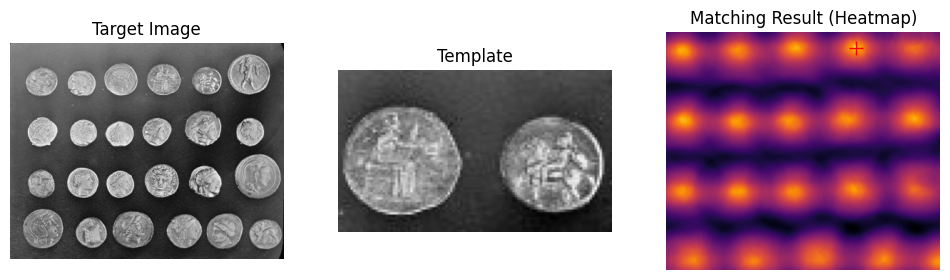

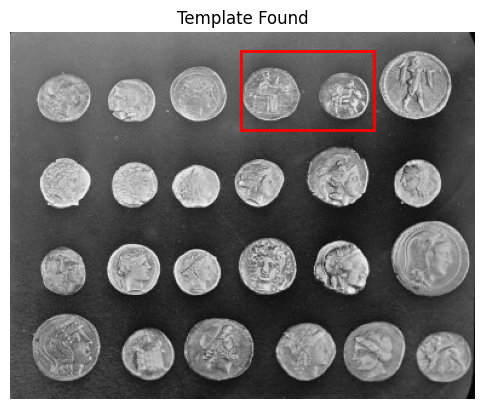

Template ditemukan di koordinat (x, y): (190, 15)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

# 1. Muat citra target dan template
image = data.coins()
template = image[15:80, 190:300]  

# 2. Template matching menggunakan Normalized Cross-Correlation
result = match_template(image, template)

# 3. Temukan lokasi dengan skor kecocokan tertinggi
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]  # Koordinat (x, y) dari sudut kiri atas template

# 4. Visualisasi
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Target Image')
ax[0].axis('off')

ax[1].imshow(template, cmap='gray')
ax[1].set_title('Template')
ax[1].axis('off')

ax[2].imshow(result, cmap='inferno')
ax[2].set_title('Matching Result (Heatmap)')
ax[2].plot(x, y, 'r+', markersize=10)  # Tanda lokasi terbaik
ax[2].axis('off')

# Tampilkan hasil pencocokan pada gambar asli
fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Template Found')
ax_main.axis('off')
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', lw=2)
ax_main.add_patch(rect)

plt.show()

# Cetak koordinat hasil pencocokan
print(f"Template ditemukan di koordinat (x, y): ({x}, {y})")


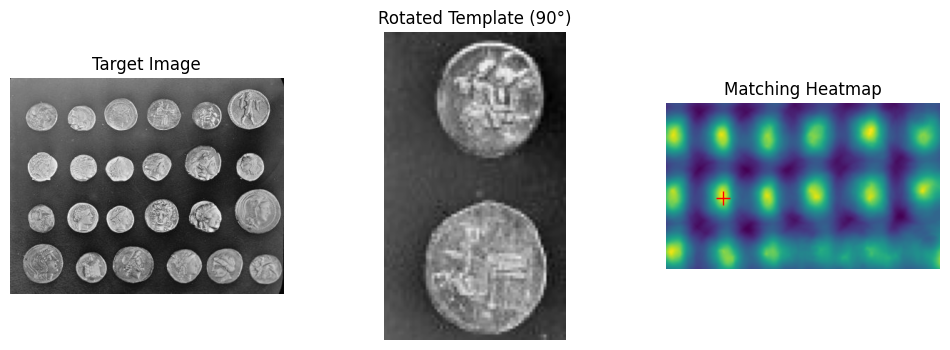

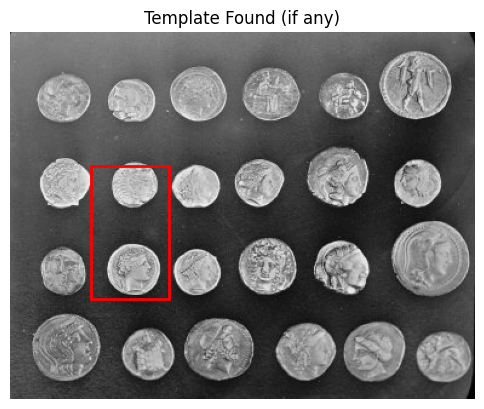

Template (rotated) ditemukan di koordinat (x, y): (66, 110)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template
from skimage.transform import rotate

# 1. Muat citra target dan template
image = data.coins()
template = image[15:80, 190:300]

# 2. Rotasi template (misalnya 30 derajat)
template_rotated = rotate(template, angle=90, resize=True)

# 3. Lakukan template matching
result = match_template(image, template_rotated)

# 4. Cari posisi dengan kecocokan tertinggi
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

# 5. Visualisasi
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Target Image')
ax[0].axis('off')

ax[1].imshow(template_rotated, cmap='gray')
ax[1].set_title('Rotated Template (90°)')
ax[1].axis('off')

ax[2].imshow(result, cmap='viridis')
ax[2].set_title('Matching Heatmap')
ax[2].plot(x, y, 'r+', markersize=10)
ax[2].axis('off')

# Tampilkan kotak pencocokan di gambar asli
fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Template Found (if any)')
ax_main.axis('off')
h, w = template_rotated.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', lw=2)
ax_main.add_patch(rect)

plt.show()

print(f"Template (rotated) ditemukan di koordinat (x, y): ({x}, {y})")


### Hasil Pengamatan
- area paling terang sesuai dengan lokasi template citra asli? Ya sesuai dan metode ini berhasil menemukan koin yang dijadikan template.
- Apakah ada keterbatasan jika template dirotasi? yaa ketika gambar dirotasi motode ini tidak bisa berhasil menemukan koin yang dijadikan template

## Praktik 5 Simulasi Content-Based Image Retrieval (CBIR)

CBIR adalah sistem dengan tujuan untuk mencari dan mengambil citra dari database yang besar secara visual mirip dengan citra yang diberikan pengguna. Cara kerjanya adalah melibatkan ekstraksi fitur seperti warna tekstur dan bentuk kemudian menghitung kemiripan antara vektor query dengan vektor setiap fitur

Memproses database citra...
- astronaut diproses.
- camera diproses.
- coffee diproses.
- coins diproses.
- chelsea diproses.

Hasil Retrieval (semakin ke kanan, semakin tidak mirip):
Rank 1: chelsea (Distance: 0.000)
Rank 2: coins (Distance: 0.288)
Rank 3: coffee (Distance: 0.359)
Rank 4: astronaut (Distance: 0.461)
Rank 5: camera (Distance: 0.602)


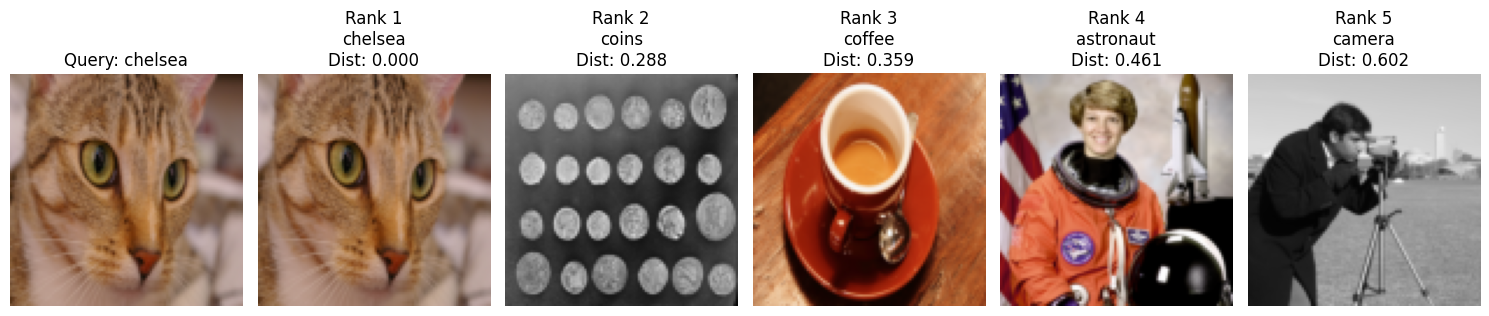

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform, img_as_float, img_as_ubyte
from scipy.spatial import distance

# Fungsi untuk menghitung histogram RGB
def calculate_rgb_histogram(image, bins=16):
    # Ubah float [0,1] ke uint8 [0,255] jika perlu
    if image.dtype == float:
        image = img_as_ubyte(image)

    # Hitung histogram tiap kanal
    hist_r, _ = np.histogram(image[:, :, 0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(image[:, :, 1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(image[:, :, 2].ravel(), bins=bins, range=(0, 256))

    # Gabungkan dan normalisasi histogram
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    hist_sum = np.sum(hist_combined)
    if hist_sum > 0:
        hist_combined = hist_combined.astype(float) / hist_sum
    else:
        hist_combined = hist_combined.astype(float)

    return hist_combined

# Daftar nama citra dari skimage
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_hists = []

print("Memproses database citra...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        # Konversi ke RGB jika grayscale
        if img.ndim == 2:
            img = color.gray2rgb(img)
        # Resize citra agar konsisten
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_hists.append(calculate_rgb_histogram(img_resized))
        print(f"- {name} diproses.")
    except Exception as e:
        print(f"Error memproses {name}: {e}")

# Pilih citra query
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_hist = database_hists[query_index]

# Hitung jarak Cosine antara query dan semua citra
distances = []
for hist in database_hists:
    dist = distance.cosine(query_hist, hist)
    distances.append(dist)

# Urutkan berdasarkan jarak terkecil
sorted_indices = np.argsort(distances)

# Tampilkan hasil
num_results_to_show = len(database_images)
fig, axes = plt.subplots(1, num_results_to_show + 1, figsize=(15, 3))

# Tampilkan citra query
axes[0].imshow(query_image)
axes[0].set_title(f"Query: {query_image_name}")
axes[0].axis('off')

print("\nHasil Retrieval (semakin ke kanan, semakin tidak mirip):")
for i, idx in enumerate(sorted_indices):
    img_rank = i + 1
    ax = axes[img_rank]
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {img_rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {img_rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

plt.tight_layout()
plt.show()


### hasil Pengamatan
- Apakah Citra yang secara visual mirip dengan query (berdasarkan warna dominan mengunakan histogram warna) muncul di peringkat atas atau jarak terkecil? Ya, pernyataan ini sesuai jika menggunakan histogram warna untuk menilai kemiripan karena semua image yang grayscale diubah menjadi rgb.
- seberapa baik histogram warna sebagai fitur pada kasus ini memiliki keunggulan tidak terpengaruh dari posisi piksel jadi ketika gambar dirotate tidak terpengaruh hasilnya.

## Penugasan 1: Simulasi CBIR dengan fitur yang berbeda menggunaan rata rata warna

Memproses database citra (fitur mean RGB)...
- astronaut diproses.
- camera diproses.
- coffee diproses.
- coins diproses.
- chelsea diproses.

Hasil Retrieval dengan fitur Mean RGB:
Rank 1: chelsea (Distance: 0.000)
Rank 2: astronaut (Distance: 0.050)
Rank 3: coffee (Distance: 0.176)
Rank 4: camera (Distance: 0.194)
Rank 5: coins (Distance: 0.211)


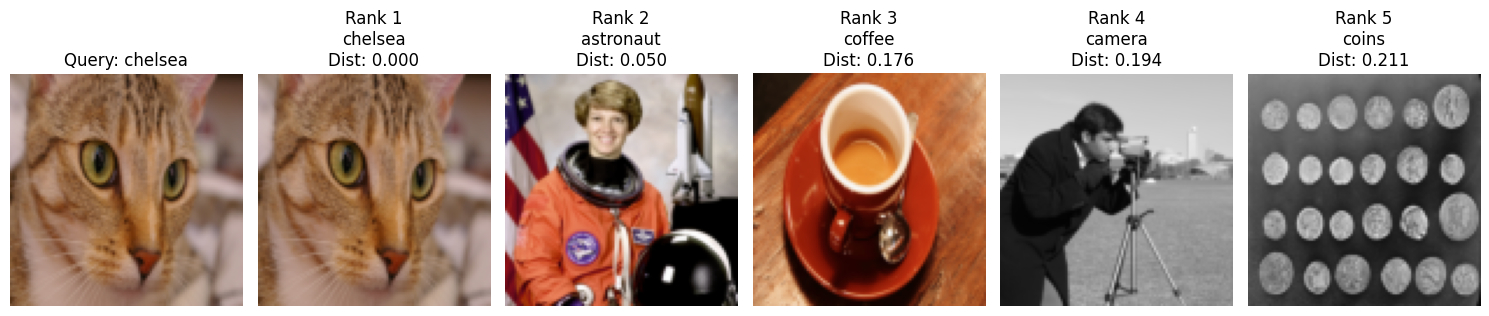

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform, img_as_float
from scipy.spatial import distance

# Fungsi untuk menghitung fitur rata-rata warna (R, G, B)
def calculate_rgb_mean(image):
    if image.ndim == 2:
        image = color.gray2rgb(image)
    image = img_as_float(image)
    mean_r = np.mean(image[:, :, 0])
    mean_g = np.mean(image[:, :, 1])
    mean_b = np.mean(image[:, :, 2])
    return np.array([mean_r, mean_g, mean_b])

# Daftar citra dari skimage
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_means = []

print("Memproses database citra (fitur mean RGB)...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_means.append(calculate_rgb_mean(img_resized))
        print(f"- {name} diproses.")
    except Exception as e:
        print(f"Error memproses {name}: {e}")

# Pilih citra query
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_mean = database_means[query_index]

# Hitung jarak Euclidean antar mean RGB
distances = []
for mean_feat in database_means:
    dist = distance.euclidean(query_mean, mean_feat)
    distances.append(dist)

# Urutkan hasil
sorted_indices = np.argsort(distances)

# Tampilkan hasil
num_results = len(database_images)
fig, axes = plt.subplots(1, num_results + 1, figsize=(15, 3))

# Tampilkan query
axes[0].imshow(query_image)
axes[0].set_title(f"Query: {query_image_name}")
axes[0].axis('off')

print("\nHasil Retrieval dengan fitur Mean RGB:")
for i, idx in enumerate(sorted_indices):
    img_rank = i + 1
    ax = axes[img_rank]
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {img_rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {img_rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

plt.tight_layout()
plt.show()


### Hasil Pengamatan

Jika dibandingkan dengan hasil menggunakan histogram warna, penggunaan fitur rata rata warna bisa lebih sederhana dan perhitungannya lebih cepat, akan tetapi memiliki kekurangan hanya mengukur satu nilai perwarna sehingga banyak informasi yang hilang. jika dinilai mana yang lebih baik jawabannya adalah dengan fitur histogram warna karena tingkat sensitivitas terhadap warna cenderung tinggi dan lebih akurat

## Penugasan 2: Percobaan Template matching Apakah standar Invariant

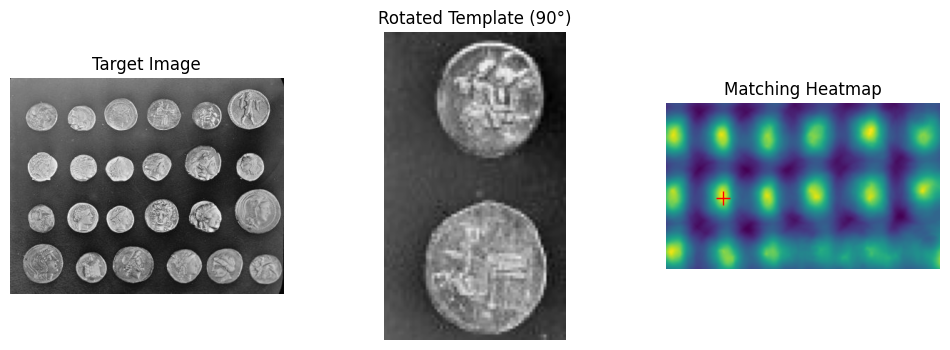

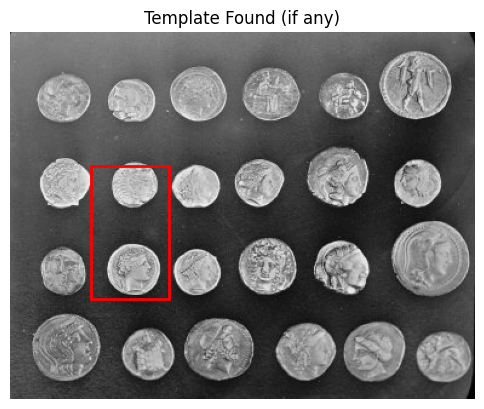

Template (rotated) ditemukan di koordinat (x, y): (66, 110)


In [13]:

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template
from skimage.transform import rotate

# 1. Muat citra target dan template
image = data.coins()
template = image[15:80, 190:300]

# 2. Rotasi template (misalnya 30 derajat)
template_rotated = rotate(template, angle=90, resize=True)

# 3. Lakukan template matching
result = match_template(image, template_rotated)

# 4. Cari posisi dengan kecocokan tertinggi
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

# 5. Visualisasi
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Target Image')
ax[0].axis('off')

ax[1].imshow(template_rotated, cmap='gray')
ax[1].set_title('Rotated Template (90°)')
ax[1].axis('off')

ax[2].imshow(result, cmap='viridis')
ax[2].set_title('Matching Heatmap')
ax[2].plot(x, y, 'r+', markersize=10)
ax[2].axis('off')

# Tampilkan kotak pencocokan di gambar asli
fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Template Found (if any)')
ax_main.axis('off')
h, w = template_rotated.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', lw=2)
ax_main.add_patch(rect)

plt.show()

print(f"Template (rotated) ditemukan di koordinat (x, y): ({x}, {y})")




### Hasil Pengamatan
rotasi atau perubahan skala. Fungsi match_template digunakan untuk mencocokkan template (potongan gambar) ke gambar target dengan cara melakukan pencocokan pola berdasarkan perbedaan nilai piksel. 

Jadi Match_template pada skimage tidak invarian terhadap skala maupun rotasi karena bisa dilihat dari percobaan diatas, hasilnya tidak bisa menemukan lokasi yang sesuai dengan template